# Exploratory Data Analysis

This is an exploratory data analysis on a series of machine learning datasets that have been combined into one large dataset. The aim of this dataset is to test and train an intrusion detection system machine learning algorithm. The goal for this assignment is to identify significant variables and gain a better understanding of the data prior to building a model.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
import warnings
import random
import scipy.stats as stats
from sklearn.decomposition import PCA

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

### Data Understanding

<p> This section explores the shape of the data, the contents of the data, and aims to discern if there are any abnormalities within the data (i.e. data types that don't make sense) and why those abnormalities exist. Those abnormalities will also be corrected.</p>

In [2]:
#import .csv
df = pd.read_csv("df.csv")

In [3]:
#check the shape of the data
df.shape

(2830743, 81)

<p>There are 2,830,743 rows and 81 columns in this dataset.</p>

In [4]:
#explore the top of the dataset
df.head()

,Unnamed: 0,Table,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,DDoS,54865,3,2,0,12,0,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,1,DDoS,55054,109,1,1,6,6,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,2,DDoS,55055,52,1,1,6,6,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,3,DDoS,46236,34,1,1,6,6,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,4,DDoS,54863,3,2,0,12,0,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
#determine which variables are categorical and may need to be encoded
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 81 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   Table                         object 
 2    Destination Port             int64  
 3    Flow Duration                int64  
 4    Total Fwd Packets            int64  
 5    Total Backward Packets       int64  
 6   Total Length of Fwd Packets   int64  
 7    Total Length of Bwd Packets  int64  
 8    Fwd Packet Length Max        int64  
 9    Fwd Packet Length Min        int64  
 10   Fwd Packet Length Mean       float64
 11   Fwd Packet Length Std        float64
 12  Bwd Packet Length Max         int64  
 13   Bwd Packet Length Min        int64  
 14   Bwd Packet Length Mean       float64
 15   Bwd Packet Length Std        float64
 16  Flow Bytes/s                  float64
 17   Flow Packets/s               float64
 18   Flow IAT Mean        

<p> Table and Label are the two categorical variables in this dataset. Label will need to be encoded in order to be used in further analysis. Label is the key feature that we need to find correlation for.</p>

In [6]:
#check the column names for irregularities
df.columns

Index(['Unnamed: 0', 'Table', ' Destination Port', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Pac

<p>Some of the column names have unneccessary spaces in them. For cleanliness, the extra spaces need to be removed.</p>

In [7]:
#remove extra spaces from column names
df.rename(columns=lambda x: x.replace(" ", ""), inplace=True)

#unnamed:0 appears to be an old index- this can be removed.
df.drop('Unnamed:0', axis=1, inplace=True)

In [8]:
df.columns

Index(['Table', 'DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s',
       'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',

<p>All of the unnecessary spaces and formatting have been successfully removed from the column names.</p>

In [9]:
#number of benign entries
label_benign = df[df['Label'] == 'BENIGN']
len(label_benign)

2273097

In [10]:
#number of malicious entries
label_malicious = df[df['Label'] != 'BENIGN']
len(label_malicious)

557646

<p>There are 2,273,097 benign entries and 557,646 malicious entries. This is approximately 80% benign and 20% malicious. These numbers will help us verify encoding in later steps.</p>

<p>The target variable in this dataset is the Label column, as this tells us whether or not an intrusion has occured. The next steps will look for variables with the most correlation to the Label column.</p> 

## Feature Analysis

In [11]:
#descriptive statistics of the data
df.describe()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [12]:
#create a column with dummy values for the benign and malicious traffic
df['label_code'] = 0
df.loc[df['Label'] != 'BENIGN', 'label_code'] = 1

In [13]:
#verify that the value counts match the above counts of the label column
df['label_code'].value_counts()

0    2273097
1     557646
Name: label_code, dtype: int64

<p>Above, all entries labeled 'Benign' were given the dummy value of 0, while all malicious traffic was given the dummy value of 1. This allows the labels to be used in further calculations to determine correlation.</p>

<p>The creation of dummy values was achieved by creating a new column entitled 'label_code' and filling it with the value 0. Then, all of the rows that were labeled anything but 'Benign' were assigned a 1, replacing the original zero and allowing us to differentiate between malicious and benign data without having to add up all of the individual malicious traffic labels.</p>

### Sampling

<p>Due to the large size of this dataset, sampling is needed in order to run visualizations. For the purpose of this assignment, the sample is a random selection equaling half the original dataset. The same sample will be used throughout the rest of this assignment, under the name 'random_sample'.</p>

In [14]:
sample_size = int(0.5 * len(df))
random_sample = df.sample(n=sample_size, random_state=123) 

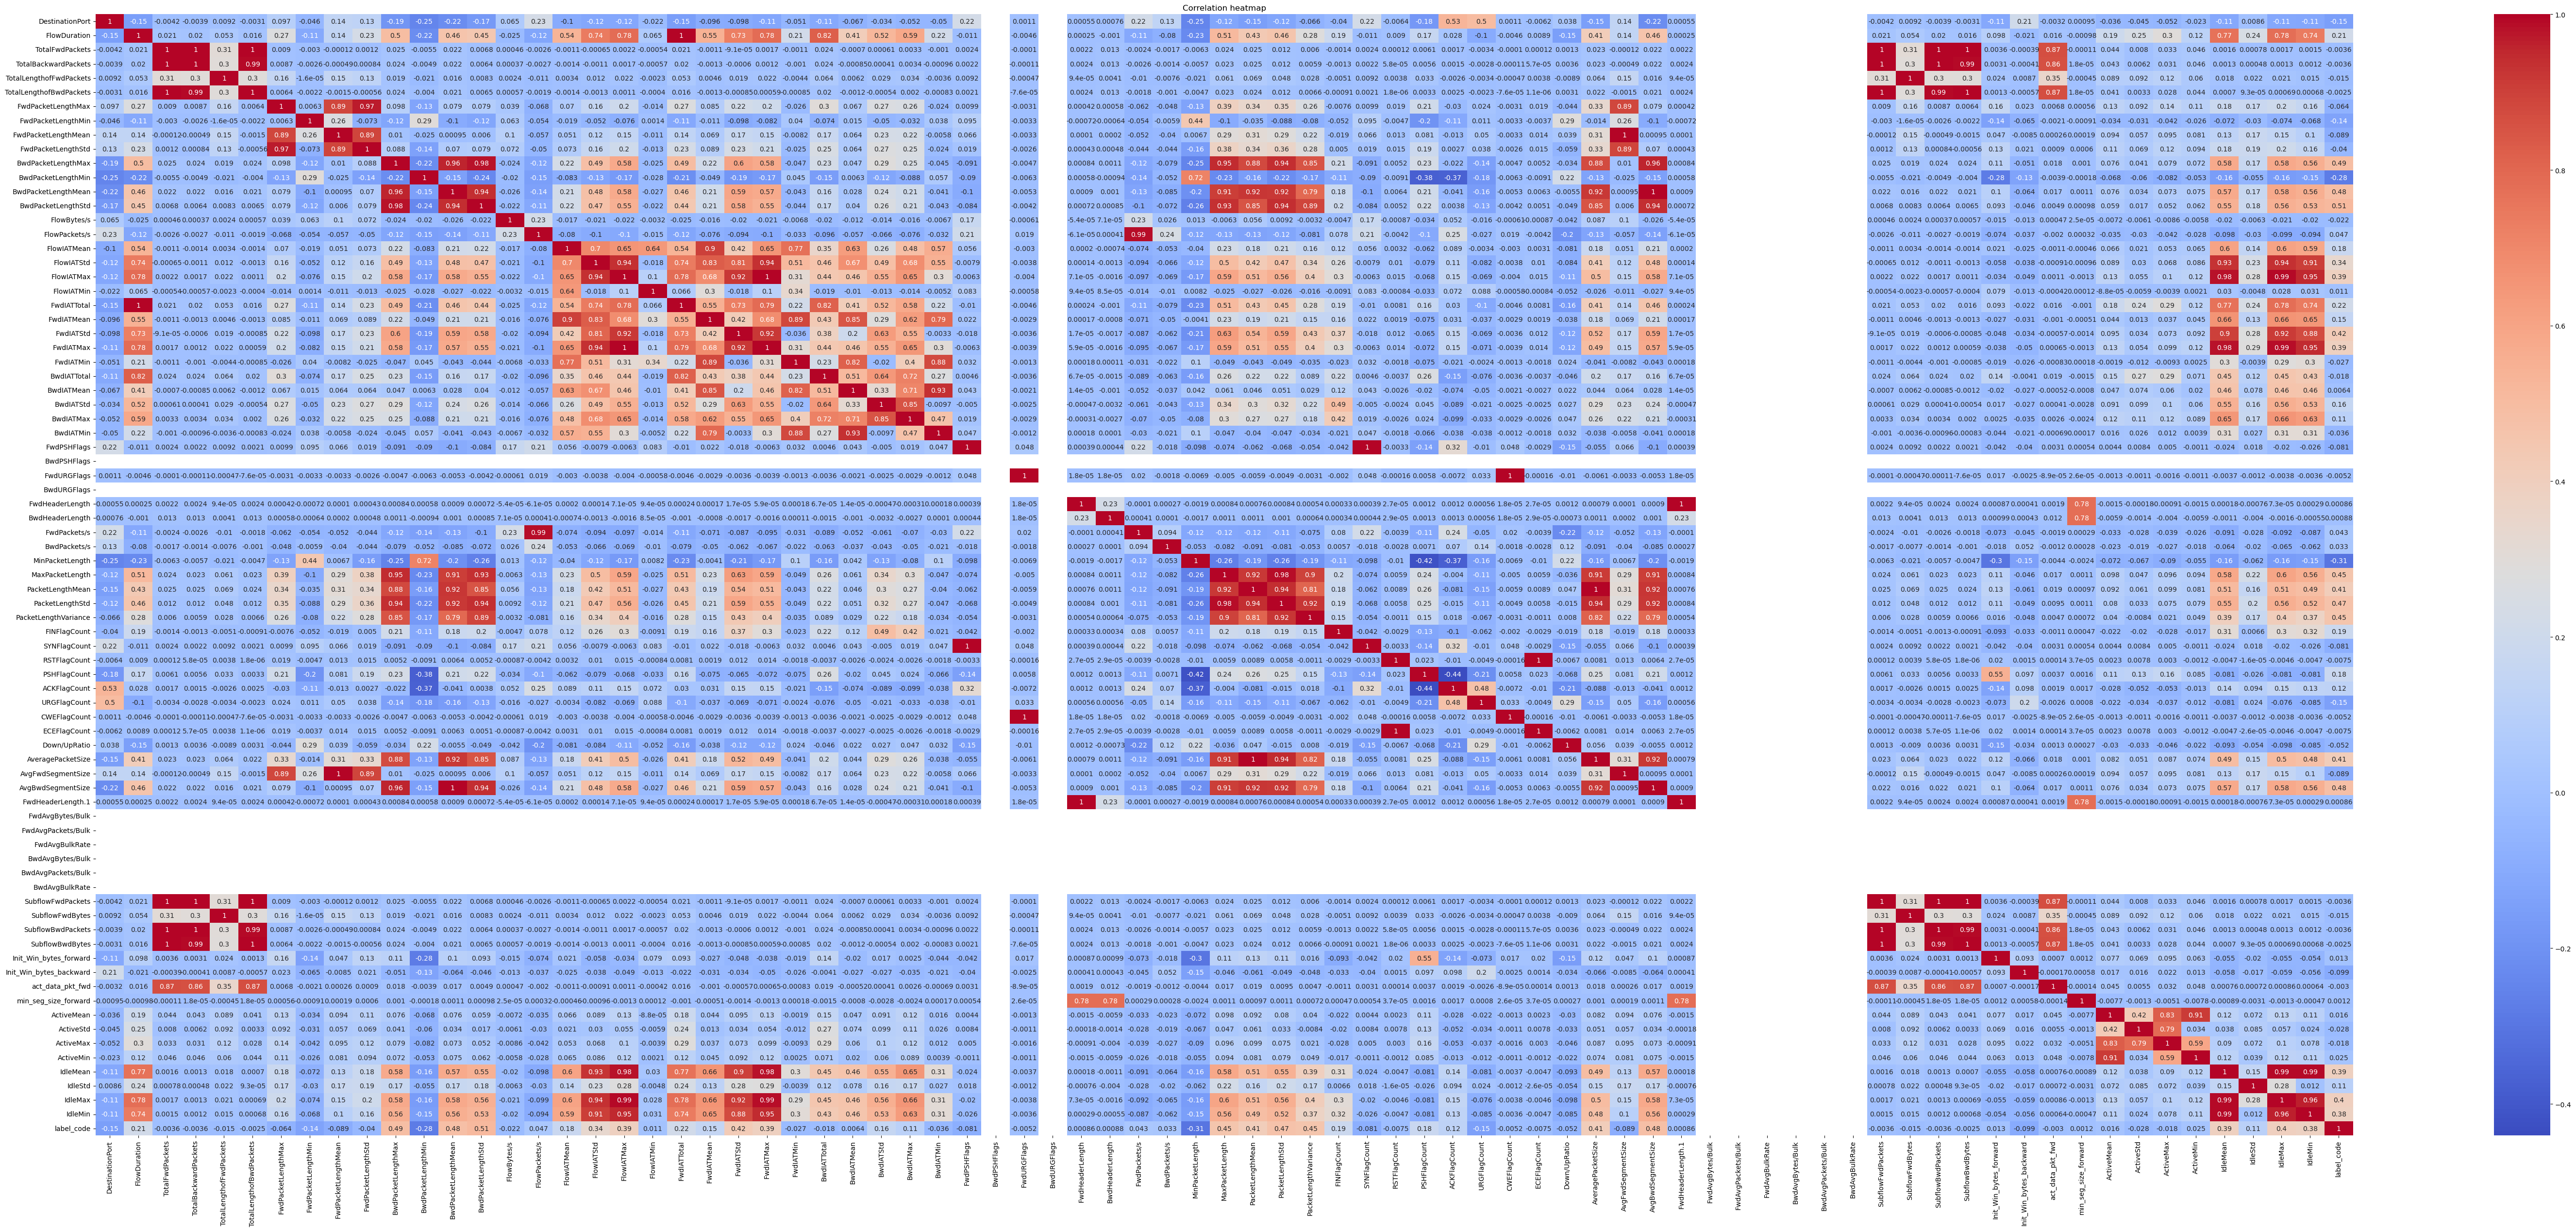

In [15]:
plt.figure(figsize=(75,30))
sns.heatmap(random_sample.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation heatmap')
plt.show()

<p>The above heatmap shows that the highest correlated features are:
<ul>
    <li>BwdPacketLengthMax</li>
    <li>BwdPacketLengthMean</li>
    <li>BwdPacketLengthStd</li>
    <li>FwdIATStd</li>
    <li>MaxPacketLength</li>
    <li>PacketLengthMean</li>
    <li>PacketLengthStd</li>
    <li>PacketLengthVariance</li>
    <li>AveragePacketSize</li>
    <li>AvgBwdSegmentSize</li>
</ul>
<p>It appears that the features to pay attention to are mostly related to packet length.</p>

In [16]:
#note the highest correlated columns for feature analysis
correlated_cols = 'BwdPacketLengthMax','BwdPacketLengthMean', 'BwdPacketLengthStd','FwdIATStd','MaxPacketLength','PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance','AveragePacketSize','AvgBwdSegmentSize'

#### Pearson Correlation Coefficient

In [17]:
pearson_corr_list = []

for col in correlated_cols:

    correlation_matrix = random_sample.corr(method='pearson')
    pearson_corr = correlation_matrix.loc[col, 'label_code']
    pearson_corr_list.append(round(pearson_corr, 4))

print("Pearson's correlation coefficient:", list(zip(correlated_cols, pearson_corr_list)))

Pearson's correlation coefficient: [('BwdPacketLengthMax', 0.4924), ('BwdPacketLengthMean', 0.4846), ('BwdPacketLengthStd', 0.5108), ('FwdIATStd', 0.4238), ('MaxPacketLength', 0.4548), ('PacketLengthMean', 0.4144), ('PacketLengthStd', 0.4708), ('PacketLengthVariance', 0.4544), ('AveragePacketSize', 0.4134), ('AvgBwdSegmentSize', 0.4846)]


## Principal Component Analysis

<p>The goal of PCA is to reduce dimensionality which can speed up training times, reduce overfit, and improve performance. The PCA will also be used for feature selection and anomaly detection.</p>

In [18]:
#remove Table and Label columns to create a numerical dataframe
df_numeric = df.drop(columns=['Table', 'Label'])

In [19]:
#verify the changes
df_numeric.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,label_code
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [20]:
#define number of components to keep
pca = PCA(n_components=10)

In [21]:
#check for null values (to avoid error during later PCA step)
for column in df_numeric.columns:
    print(f"Column: {column}")
    print(df_numeric[column].isna().sum())
    print()

Column: DestinationPort
0

Column: FlowDuration
0

Column: TotalFwdPackets
0

Column: TotalBackwardPackets
0

Column: TotalLengthofFwdPackets
0

Column: TotalLengthofBwdPackets
0

Column: FwdPacketLengthMax
0

Column: FwdPacketLengthMin
0

Column: FwdPacketLengthMean
0

Column: FwdPacketLengthStd
0

Column: BwdPacketLengthMax
0

Column: BwdPacketLengthMin
0

Column: BwdPacketLengthMean
0

Column: BwdPacketLengthStd
0

Column: FlowBytes/s
1358

Column: FlowPackets/s
0

Column: FlowIATMean
0

Column: FlowIATStd
0

Column: FlowIATMax
0

Column: FlowIATMin
0

Column: FwdIATTotal
0

Column: FwdIATMean
0

Column: FwdIATStd
0

Column: FwdIATMax
0

Column: FwdIATMin
0

Column: BwdIATTotal
0

Column: BwdIATMean
0

Column: BwdIATStd
0

Column: BwdIATMax
0

Column: BwdIATMin
0

Column: FwdPSHFlags
0

Column: BwdPSHFlags
0

Column: FwdURGFlags
0

Column: BwdURGFlags
0

Column: FwdHeaderLength
0

Column: BwdHeaderLength
0

Column: FwdPackets/s
0

Column: BwdPackets/s
0

Column: MinPacketLength
0

C

In [22]:
#drop null values from flowbytes
df_numeric = df_numeric.dropna(subset=['FlowBytes/s'])

In [23]:
#double check results
print(df_numeric.isnull().sum().sum())

0


In [24]:
#check for inf values (to avoid 0error during later PCA steps)
for column in df_numeric.columns:
    print(f"Column: {column}")
    print(np.isinf(df_numeric[column]).sum())
    print()

Column: DestinationPort
0

Column: FlowDuration
0

Column: TotalFwdPackets
0

Column: TotalBackwardPackets
0

Column: TotalLengthofFwdPackets
0

Column: TotalLengthofBwdPackets
0

Column: FwdPacketLengthMax
0

Column: FwdPacketLengthMin
0

Column: FwdPacketLengthMean
0

Column: FwdPacketLengthStd
0

Column: BwdPacketLengthMax
0

Column: BwdPacketLengthMin
0

Column: BwdPacketLengthMean
0

Column: BwdPacketLengthStd
0

Column: FlowBytes/s
1509

Column: FlowPackets/s
1509

Column: FlowIATMean
0

Column: FlowIATStd
0

Column: FlowIATMax
0

Column: FlowIATMin
0

Column: FwdIATTotal
0

Column: FwdIATMean
0

Column: FwdIATStd
0

Column: FwdIATMax
0

Column: FwdIATMin
0

Column: BwdIATTotal
0

Column: BwdIATMean
0

Column: BwdIATStd
0

Column: BwdIATMax
0

Column: BwdIATMin
0

Column: FwdPSHFlags
0

Column: BwdPSHFlags
0

Column: FwdURGFlags
0

Column: BwdURGFlags
0

Column: FwdHeaderLength
0

Column: BwdHeaderLength
0

Column: FwdPackets/s
0

Column: BwdPackets/s
0

Column: MinPacketLength
0

In [25]:
#replace the inf values from FlowBytes/s and FlowPackets/s
df_numeric = df_numeric.replace([np.inf, -np.inf], 1e9)

In [26]:
#verify results
np.isinf(df_numeric).sum().sum()

0

In [27]:
reduced_data = pca.fit_transform(df_numeric)

Explained Variance Ratios: [0.55888132 0.1579557  0.09618485 0.09356343 0.03592581 0.02510699
 0.0178153  0.00663697 0.00298677 0.00108532]


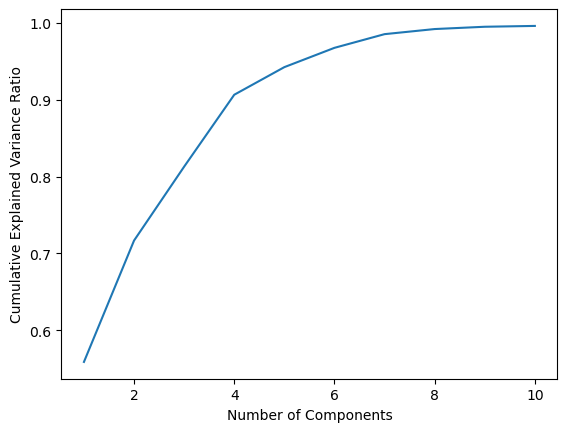

In [28]:
#explain vairance associated with each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

#determine the "elbow" of appropriate number of components
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

<p>The optimal number of components for this data is 7.</p>

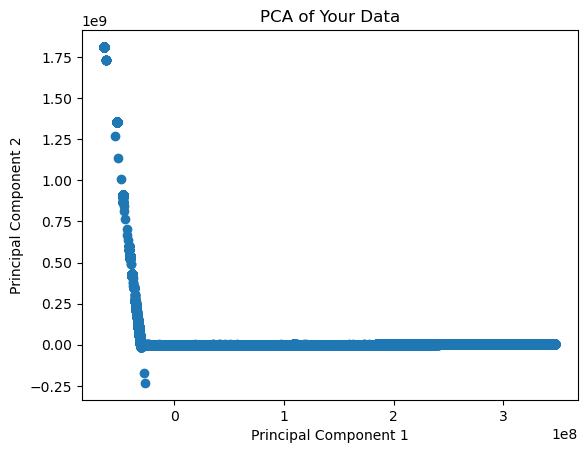

In [29]:
#visualize the relationship between principal components
pca = PCA(n_components=7)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Your Data')
plt.show()

## Conclusion

<p>Using pearson correlation coefficients and heatmaps, I was able to pull the 10 most correlated features in the dataset. Then I performed a PCA to determine the optimal number of features (7) and look at the relationship of the data. Since the data overlaps a lot, it may prove difficult to classify later on. There are a few outliers, however. I am hesitant to remove the outliers as they may be indicative of malicious traffic. </p>

<p>In order to get this dataset usable for the next steps of the process, I had to remove unnecessary spaces from the column names and create dummy values for malicious vs benign traffic in order to use those labels in analysis. The creation of these dummy values will prove useful in the next step: pre-processing.</p>